
<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />

## Deep learning: Convolutional Neural Newtorks

This notebook shows how to build a CNN to classify images. We will use [Keras](https://keras.io/) is used as high-level API for [tensorflow](https://www.tensorflow.org/) backend). 

In [2]:
conda install -c https://conda.binstar.org/menpo opencv

Retrieving notices: ...working... done
Channels:
 - https://conda.binstar.org/menpo
 - defaults
 - conda-forge
Platform: osx-64

UnavailableInvalidChannel: HTTP 404 NOT FOUND for channel menpo <https://conda.binstar.org/menpo>

The channel is not accessible or is invalid.

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.



Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras import backend as K
from keras.utils.np_utils import convert_kernel

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

In [14]:
#import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Preprocess raw URLs

In [12]:
## Load data URL

DATA_HOME = '/Volumes/ext200/Dropbox/CIC-IDS/X_test_images_b.npy'
x_test_images_b = np.load(DATA_HOME)
x_test_images_b.shape

(334772, 9, 9, 1)

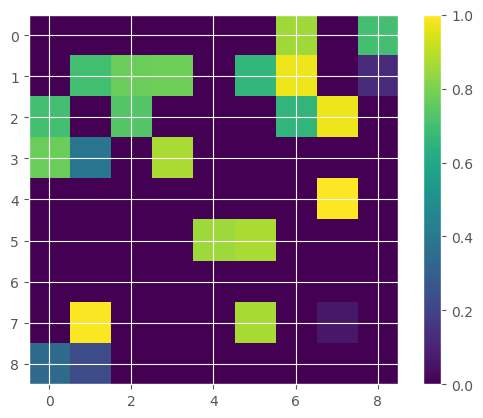

In [15]:
plt.imshow(x_test_images_b[0])
plt.colorbar()
plt.show()

In [ ]:

# Define initializers
conv_initializer   = HeNormal(seed=seed_pi)
dense_initializer  = HeUniform(seed=seed_pi)
output_initializer = GlorotUniform(seed=seed_pi)

model_0 = Sequential([
    Input(shape=(9, 9, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=conv_initializer),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation = 'relu', kernel_initializer = dense_initializer),
    Dense(1, activation = 'sigmoid', kernel_initializer = output_initializer)])


model_0.summary()

In [ ]:
# Define Early Stopping callback to monitor validation loss
early_stopping = EarlyStopping(
    monitor='val_accuracy',    # Monitor validation accuracy
    patience=10,               # Stop training after 10 epochs with no improvement
    verbose=1,                 # Provide verbose output when early stopping is triggered
    restore_best_weights=True) # Restore model weights with best validation loss

# Define ReduceLROnPlateau scheduler, LR:Learning Rate
reduce_lr = ReduceLROnPlateau( 
    monitor='val_accuracy',    # Monitor validation accuracy
    patience= 5,               # Default value for patience is 10
    min_lr= 1e-07,             # min_lr: Minimum learning rate (deafault value=0.0001)
    verbose=1,                 # Provide verbose output when learning rate is reduced
    factor= 0.1)               # The default factor is 0.1, which reduces 
                               # the learning rate by 10% when triggered.    

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metrics
model_0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_0  = model_0.fit(X_train_images, y_train, validation_data=(X_val_images, y_val), epochs=250, 
    batch_size=1024, callbacks=[early_stopping, reduce_lr])

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_0.evaluate(X_test_images, y_test)

# Make predictions on the test set
y_pred = model_0.predict(X_test_images)

# Convert predicted probabilities to class labels
y_pred_labels = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels)
recall    = recall_score(y_test, y_pred_labels)
f1        = f1_score(y_test, y_pred_labels)

# Print the evaluation metrics
print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_accuracy*100:.2f}%")
print(f"Test Precision: {precision*100:.2f}%")
print(f"Test Recall:    {recall*100:.2f}%")
print(f"Test F1 Score:  {f1*100:.2f}%")

In [ ]:
train_loss = history_0.history['loss']
val_loss   = history_0.history['val_loss']
train_acc  = history_0.history['accuracy']
val_acc    = history_0.history['val_accuracy']

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot loss curves
sns.lineplot(x=range(len(train_loss)), y=train_loss, ax=axes[0], label='Training Loss')
sns.lineplot(x=range(len(val_loss)),   y=val_loss, ax=axes[0], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss for Binary Classification')
axes[0].legend()
axes[0].grid(True)

# Plot accuracy curves
sns.lineplot(x=range(len(train_acc)), y=train_acc, ax=axes[1], label='Training Accuracy')
sns.lineplot(x=range(len(val_acc)),   y=val_acc, ax=axes[1], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Accuracy for Binary Classification')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Multiclass configuration

In [ ]:
# Extract features as X
X = df_data.copy()
X = df_data.drop('Label', axis=1)

# Extract target as y
y = df_data['Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = pd.Series(y_encoded)

# Inspect encoding
print('Inspection of Target Feature - y under Multiclass Configuration:\n')
y.value_counts()

Plotting the distribution of the target variable y_encoded_sorted


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y=y, palette='Paired')
plt.title('Distribution of Target Variable')
plt.xlabel('Encoded Target Class')
plt.ylabel('Count')
plt.show()

# Calculate the count and ratio of each class
class_counts = y.value_counts()
class_ratios = class_counts / len(y)

# Print the ratio of each class
for label, ratio in class_ratios.items():
    if label < 10:
        print(f"Class {label}  ratio: {ratio*100:.4f}%")
    else:
        print(f"Class {label} ratio: {ratio*100:.4f}%")

In [ ]:
Extract all sets with percentages: 75-10-15 (%) under multiclass configuration

X_train, X_val, X_test, y_train, y_val, y_test = extractAllSets(X, y, 0.75, 0.10, 0.15)

# Organize all sets in list format
original_data = [X_train, X_val, X_test, y_train, y_val, y_test]

In [ ]:
Conversion to greyscale images

# Define the Tab2Img model
model_tab2img = Tab2Img()

""" In this stage, every sample in the data becomes a (9x9) numpy array. """
# Convert training data
X_train_images = model_tab2img.fit_transform(X_train_transformed, y_train.values)

# Convert validation and test data (using the fitted model)
X_val_images  = model_tab2img.transform(X_val_transformed)
X_test_images = model_tab2img.transform(X_test_transformed)

""" In this stage, every array in the data becomes a (9x9x1) greyscale image. """
# Greyscale Transformation - Reshape the image data for CNN input
X_train_images = X_train_images.reshape(-1, 9, 9, 1)
X_val_images   = X_val_images.reshape(  -1, 9, 9, 1)
X_test_images  = X_test_images.reshape( -1, 9, 9, 1)

# Visualize an example
plt.imshow(X_train_images[0])
plt.colorbar()
plt.show()

During this segment, the original model is modified to be adjusted for multiclass classification; Aside the output layer and the loss function, exactly the same architecture is utilized, with the same hyperparameters. Due to its different output layer (15 units instead of 1), it has about ~ 2,000 extra parameters. Evaluated on the same metrics, it achieves state-of-the-art results.

In [ ]:
Define the model architecture

# Define initializers
conv_initializer   = HeNormal(seed=seed_pi)
dense_initializer  = HeUniform(seed=seed_pi)
output_initializer = GlorotUniform(seed=seed_pi)

# Adjust ouput layer
num_classes = len(class_counts) 

model_1 = Sequential([
    Input(shape=(9, 9, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=conv_initializer),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer=dense_initializer),
    Dense(num_classes, activation='softmax', kernel_initializer=output_initializer)
])

# Print model summary
model_1.summary()